# DBSCAN

<br> 

Throughout this notebook, the DBSCAN model will be implemented on both the Zero and Nonzero Datasets.

## <u> Table of Contents </u>
* [Import the DataSet](#1)
* [Modelling Zero Data](#22.3)
    * [Elbow & Silhoutte: Zero](#23)
    * [Modelling Original](#23.1)
        * [Zero: DBSCAN](#M4)
        * [Zero Visualisation](#N0)
* [Modelling Nonzero Data](#NN)
    * [Elbow & Silhoutte: Nonzero](#MU) 
        * [Nonzero: DBSCAN](#M9)
        * [Nonzero Visualisation](#N00)
<br>

## Import the DataSet  <a class="anchor" id="1"></a>

In [1]:
#!pip install plotly
#!pip install joypy
#!pip install pyvis
#!pip install prince
#!pip install pyclustering
#!pip install clusteval
#!pip install kmodes
#!pip install gower
#!pip install scikit-learn-extra
#!pip install minisom
#!pip install fuzzy-c-means

In [2]:
# Remove the warnings

import warnings; warnings.simplefilter('ignore')

# Basic Packages

import pandas as pd
import numpy as np
from numpy import asarray
from numpy import save

# Set a random state 

np.random.seed(9)

# Notebook Setup

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
pd.set_option('display.max_columns', None)

# Plotting Packages

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from matplotlib.widgets import SpanSelector
from bokeh.models import Div, RangeSlider, Spinner
from bokeh.plotting import figure, show
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from joypy import joyplot
from pyvis.network import Network
from IPython.display import Image
import plotly.offline as pyo

# Set notebook mode to work in offline

pyo.init_notebook_mode()

# Packages for Transformations

import scipy.special
import prince
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Packages for Clustering

from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from clusteval import clusteval
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering 
import gower
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from minisom import MiniSom
from sklearn.cluster import Birch
import scipy.cluster.hierarchy as shc
from fcmeans import FCM

# Packages to measure performance

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from scipy.spatial import distance as ssd
from pyclustering.cluster.kmedoids import kmedoids

In [3]:
# Import the zero dataset 

final_zero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/final_zero.csv')
tra_zero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/tra_zero.csv')
zero_df = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/zero_df.csv')

# Import the nonzero dataset 

final_nonzero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/final_nonzero.csv')
tra_nonzero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/tra_nonzero.csv')
nonzero_df = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/nonzero_df.csv')

## Model Definition

In [1077]:
# We define the models we are interested in set the parameters to evaluate the GOF

ce_dbscan = clusteval(cluster='dbscan')

<br>

## Elbow & Silhoutte: Zero  <a class="anchor" id="23"></a>

For the visualisations we use a package called clusteval which easily computes and depicts the measurements of goodness of fit (GOF) for the models.
<br>

**Zero Data-Set**

In [1078]:
# we create an array based on the dataset

numpy_arr_1 = final_zero.to_numpy()


[clusteval] >Fit using dbscan with metric: euclidean, and linkage: ward
[clusteval] >Gridsearch across epsilon..
[clusteval] >Evaluate using silhouette..


100%|█████████████████████████████████████████| 245/245 [04:22<00:00,  1.07s/it]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [10].
[clusteval] >Fin.


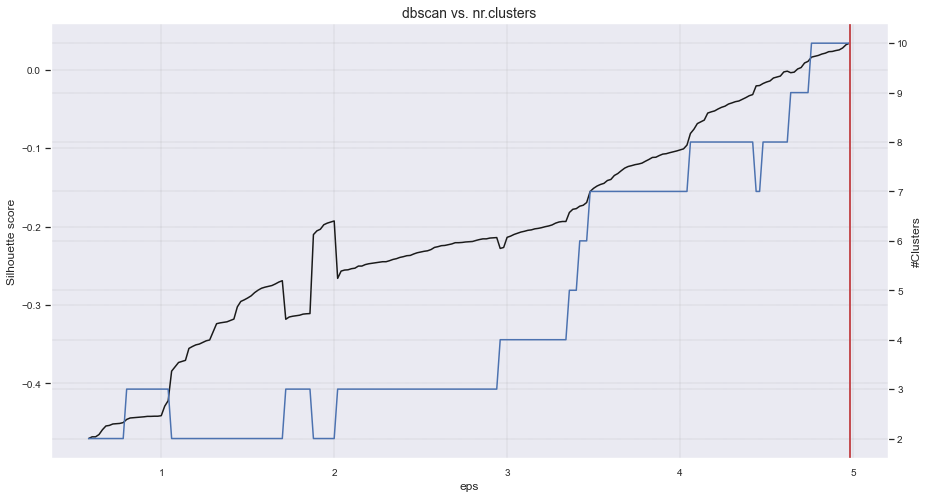

(<Figure size 1080x576 with 2 Axes>,
 (<AxesSubplot:title={'center':'dbscan vs. nr.clusters'}, xlabel='eps', ylabel='Silhouette score'>,
  <AxesSubplot:ylabel='#Clusters'>))

In [1081]:
# Fit the array to find optimal number of clusters

ce_dbscan.fit(numpy_arr_1)

# Make plot of the silhouette

ce_dbscan.plot()

## Modeling Zero Data  <a class="anchor" id="22.3"></a>

Throughout this section we will try different classicl clustering algorithms to see how well they perform. For the purpose of the excercise, three models were selected, namely: <br>
- K-Means <br>
- Hierarchical Clustering<br>
- K-Modes. <br><br>

The first two model usually perform well on clusters that predominantly present numerical features. On the other hand, the latter model theoretically performs well on datasets characterised by categorical features. <br>
By applying these three models it is possible to use two different approaches and monitor the results. <br>

###  Zero

In [1086]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

#### DBSCAN  <a class="anchor" id="M4"></a>

In [1365]:
# we set the function for DBSCAN with euclidean distance

db = DBSCAN(eps = 5, min_samples = 90, metric ='minkowski')

# Fit the function to the original nonzero dataset

db.fit(final_zero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_zero['Cluster_DBSCAN'] = db.labels_
tra_zero['Cluster_DBSCAN'] = db.labels_

zero_df["Cluster_DBSCAN"] = db.labels_
zero_df['Cluster_DBSCAN'].value_counts()

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [1100]:
print(silhouette_score(final_zero, final_zero["Cluster_DBSCAN"]))
print(calinski_harabasz_score(final_zero, final_zero["Cluster_DBSCAN"]))
print(davies_bouldin_score(final_zero, final_zero["Cluster_DBSCAN"]))

print(silhouette_score(zero_df, zero_df['Cluster_DBSCAN']))
print(calinski_harabasz_score(zero_df, zero_df['Cluster_DBSCAN']))
print(davies_bouldin_score(zero_df, zero_df['Cluster_DBSCAN']))

-0.05831195007839914
110.24206458284847
1.6733795224980246
-0.5399576722806076
11.659955758314359
13.50341749588284


In [1331]:
#!pip install vdbscan

#!pip install kmedoids

from kmedoids import fasterpam

     |████████████████████████████████| 627 kB 3.4 MB/s eta 0:00:01


## Zero Visualisation <a class="anchor" id="N0"></a>

In [1101]:
tt = tra_zero.drop(columns=['Cluster_k', 'Cluster_h', 'Cluster_DBSCAN'])

PCs_1d = pd.DataFrame(pca_1d.fit_transform(tt))

PCs_2d = pd.DataFrame(pca_2d.fit_transform(tt))

PCs_3d = pd.DataFrame(pca_3d.fit_transform(tt))


#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'

PCs_1d.columns = ["PC1_1d"]

PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


tra_zero1=tra_zero.copy()

tra_zero1 = pd.concat([tra_zero1,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')



cluster0_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == -1]
cluster1_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == 0]
cluster2_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == 1]
cluster3_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == 2]
cluster4_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == 3]
cluster5_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == 4]
cluster6_d = tra_zero1[tra_zero1["Cluster_DBSCAN"] == 5]

In [1102]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter(
                    x = cluster0_d["PC1_2d"],
                    y = cluster0_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter(
                    x = cluster1_d["PC1_2d"],
                    y = cluster1_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter(
                    x = cluster2_d["PC1_2d"],
                    y = cluster2_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter(
                    x = cluster3_d["PC1_2d"],
                    y = cluster3_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter(
                    x = cluster4_d["PC1_2d"],
                    y = cluster4_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter(
                    x = cluster5_d["PC1_2d"],
                    y = cluster5_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)

#For 'Cluster 6'
trace6 = go.Scatter(
                    x = cluster6_d["PC1_2d"],
                    y = cluster6_d["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'red'),
                    text = None)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)


In [1103]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter3d(
                    x = cluster0_d["PC1_3d"],
                    y = cluster0_d["PC2_3d"],
                    z = cluster0_d["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter3d(
                    x = cluster1_d["PC1_3d"],
                    y = cluster1_d["PC2_3d"],
                    z = cluster1_d["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter3d(
                    x = cluster2_d["PC1_3d"],
                    y = cluster2_d["PC2_3d"],
                    z = cluster2_d["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter3d(
                    x = cluster3_d["PC1_3d"],
                    y = cluster3_d["PC2_3d"],
                    z = cluster3_d["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter3d(
                    x = cluster4_d["PC1_3d"],
                    y = cluster4_d["PC2_3d"],
                    z = cluster4_d["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter3d(
                    x = cluster5_d["PC1_3d"],
                    y = cluster5_d["PC2_3d"],
                    z = cluster5_d["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)

#For 'Cluster 6'
trace6 = go.Scatter3d(
                    x = cluster6_d["PC1_3d"],
                    y = cluster6_d["PC2_3d"],
                    z = cluster6_d["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'red'),
                    text = None)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)

###  Non-Zero <a class="anchor" id="NN"></a>

## Elbow & Silhoutte <a class="anchor" id="MU"></a>

In [ ]:
# we create an array based on the dataset

numpy_arr_2 = final_nonzero.to_numpy()

# Fit the array to find optimal number of clusters

ce_dbscan.fit(numpy_arr_2)

# Make plot of the silhouette

ce_dbscan.plot()


#### DBSCAN  <a class="anchor" id="M9"></a>

In [1118]:
# we set the function for DBSCAN with euclidean distance

db_nonzero = DBSCAN(eps= 4.8, min_samples= 120, metric= 'euclidean')

# Fit the function to the original nonzero dataset

db_nonzero.fit(final_nonzero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_nonzero['Cluster_DBSCAN'] = db_nonzero.labels_
tra_nonzero['Cluster_DBSCAN'] = db_nonzero.labels_

nonzero_df["Cluster_DBSCAN"] = db_nonzero.labels_
nonzero_df['Cluster_DBSCAN'].value_counts()

-1    11346
 6      561
 7      439
 5      425
 4      335
 0      216
 1      205
 3      159
 2      121
Name: Cluster_DBSCAN, dtype: int64

In [1119]:
print(silhouette_score(final_nonzero, final_nonzero["Cluster_DBSCAN"]))
print(calinski_harabasz_score(final_nonzero, final_nonzero["Cluster_DBSCAN"]))
print(davies_bouldin_score(final_nonzero, final_nonzero["Cluster_DBSCAN"]))

print(silhouette_score(nonzero_df, nonzero_df['Cluster_DBSCAN']))
print(calinski_harabasz_score(nonzero_df, nonzero_df['Cluster_DBSCAN']))
print(davies_bouldin_score(nonzero_df, nonzero_df['Cluster_DBSCAN']))

-0.44072456173892666
317.6168599235681
1.1097437566137334
-0.8452115699801002
2.5788885264423804
6.707966453323787


## Nonzero Visualisation <a class="anchor" id="N00"></a>

In [1120]:
nn = tra_nonzero.drop(columns=['Cluster_k', 'Cluster_h', 'Cluster_DBSCAN'])

PCs_1d_n = pd.DataFrame(pca_1d.fit_transform(nn))

PCs_2d_n = pd.DataFrame(pca_2d.fit_transform(nn))

PCs_3d_n = pd.DataFrame(pca_3d.fit_transform(nn))


#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'

PCs_1d_n.columns = ["PC1_1d"]

PCs_2d_n.columns = ["PC1_2d", "PC2_2d"]

PCs_3d_n.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


tra_nonzero1=tra_nonzero.copy()

tra_nonzero1 = pd.concat([tra_nonzero1,PCs_1d_n,PCs_2d_n,PCs_3d_n], axis=1, join='inner')



cluster0_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == -1]
cluster1_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 0]
cluster2_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 1]
cluster3_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 2]
cluster4_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 3]
cluster5_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 4]
cluster6_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 5]
cluster7_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 6]
cluster8_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 7]
cluster9_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 8]
cluster10_nd = tra_nonzero1[tra_nonzero1["Cluster_DBSCAN"] == 9]

In [1121]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter(
                    x = cluster0_nd["PC1_2d"],
                    y = cluster0_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter(
                    x = cluster1_nd["PC1_2d"],
                    y = cluster1_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter(
                    x = cluster2_nd["PC1_2d"],
                    y = cluster2_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter(
                    x = cluster3_nd["PC1_2d"],
                    y = cluster3_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter(
                    x = cluster4_nd["PC1_2d"],
                    y = cluster4_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter(
                    x = cluster5_nd["PC1_2d"],
                    y = cluster5_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)

#For 'Cluster 6'
trace6 = go.Scatter(
                    x = cluster6_nd["PC1_2d"],
                    y = cluster6_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'red'),
                    text = None)

#For 'Cluster 7'
trace7 = go.Scatter(
                    x = cluster7_nd["PC1_2d"],
                    y = cluster7_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 7",
                    marker = dict(color = 'green'),
                    text = None)

#For 'Cluster 8'
trace8 = go.Scatter(
                    x = cluster8_nd["PC1_2d"],
                    y = cluster8_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 8",
                    marker = dict(color = 'yellow'),
                    text = None)

#For 'Cluster 9'
trace9 = go.Scatter(
                    x = cluster9_nd["PC1_2d"],
                    y = cluster9_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 9",
                    marker = dict(color = 'purple'),
                    text = None)

#For 'Cluster 10'
trace10 = go.Scatter(
                    x = cluster10_nd["PC1_2d"],
                    y = cluster10_nd["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 10",
                    marker = dict(color = 'brown'),
                    text = None)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)

In [1122]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter3d(
                    x = cluster0_nd["PC1_3d"],
                    y = cluster0_nd["PC2_3d"],
                    z = cluster0_nd["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter3d(
                    x = cluster1_nd["PC1_3d"],
                    y = cluster1_nd["PC2_3d"],
                    z = cluster1_nd["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter3d(
                    x = cluster2_nd["PC1_3d"],
                    y = cluster2_nd["PC2_3d"],
                    z = cluster2_nd["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter3d(
                    x = cluster3_nd["PC1_3d"],
                    y = cluster3_nd["PC2_3d"],
                    z = cluster3_nd["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter3d(
                    x = cluster4_nd["PC1_3d"],
                    y = cluster4_nd["PC2_3d"],
                    z = cluster4_nd["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter3d(
                    x = cluster5_nd["PC1_3d"],
                    y = cluster5_nd["PC2_3d"],
                    z = cluster5_nd["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)

#For 'Cluster 6'
trace6 = go.Scatter3d(
                    x = cluster6_nd["PC1_3d"],
                    y = cluster6_nd["PC2_3d"],
                    z = cluster6_nd["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'red'),
                    text = None)


#For 'Cluster 7'
trace7 = go.Scatter3d(
                    x = cluster7_nd["PC1_2d"],
                    y = cluster7_nd["PC2_2d"],
                    z = cluster7_nd["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 7",
                    marker = dict(color = 'green'),
                    text = None)

#For 'Cluster 8'
trace8 = go.Scatter3d(
                    x = cluster8_nd["PC1_2d"],
                    y = cluster8_nd["PC2_2d"],
                    z = cluster8_nd["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 8",
                    marker = dict(color = 'yellow'),
                    text = None)

#For 'Cluster 9'
trace9 = go.Scatter3d(
                    x = cluster9_nd["PC1_2d"],
                    y = cluster9_nd["PC2_2d"],
                    z = cluster9_nd["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 9",
                    marker = dict(color = 'purple'),
                    text = None)

#For 'Cluster 10'
trace10 = go.Scatter3d(
                    x = cluster10_nd["PC1_2d"],
                    y = cluster10_nd["PC2_2d"],
                    z = cluster10_nd["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 10",
                    marker = dict(color = 'brown'),
                    text = None)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)